In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from pydataset import data
from evaluate import plot_residuals, regression_errors, better_than_baseline
import matplotlib.pyplot as plt

1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')

In [3]:
df


,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
model = LinearRegression().fit(df[['total_bill']], df[['tip']])
predictions = model.predict(df[['total_bill']])


In [6]:
df['yhat'] = predictions

In [7]:
df

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
241,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
242,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
243,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


In [8]:
df['yhat_baseline'] = df.tip.mean()

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


In [10]:
df['residuals'] = df.tip - df.yhat

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178


In [12]:
df['baseline_residuals'] = df.tip - df.yhat_baseline

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residuals,baseline_residuals
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


3. Plot the residuals for the linear regression model that you made.

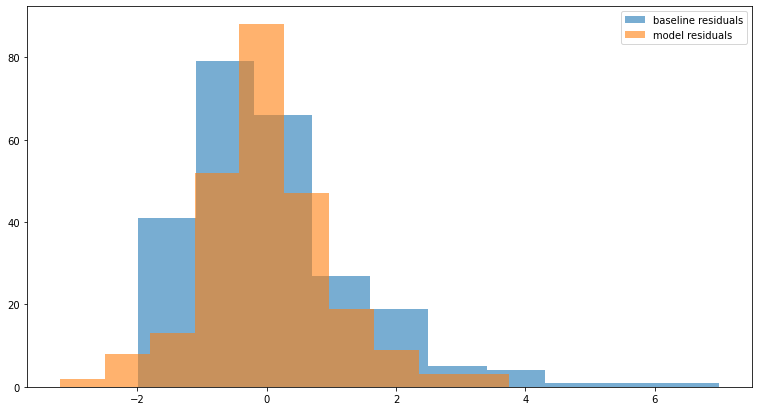

In [14]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [15]:
# Sum of squared errors
sse = (df.residuals ** 2).sum()
sse

252.788743850776

In [16]:
n = df.shape[0]

In [17]:
# Mean squared error
mse = sse / n
mse

1.036019442011377

In [18]:
# Root mean squared error
rmse = math.sqrt(mse)
rmse

1.0178504025697377

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [19]:
# Baseline sum of squared errors, Mean squared error and root mean squared error

sse_baseline = (df.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline / n
rmse_baseline = math.sqrt(mse_baseline)

print(f'''
Baseline:

sse:  {sse_baseline}
mse:  {mse_baseline}
rmse: {rmse_baseline}
''')


Baseline:

sse:  465.2124770491804
mse:  1.906608512496641
rmse: 1.3807999538298954



In [20]:
# Explained sum of squares
ess = ((df.yhat - df.tip.mean())**2).sum()
# Total sum of squares
tss = ((df.tip - df.tip.mean())**2).sum()

ess / tss

0.4566165863516761

In [21]:
# r2_score == explained_variance_score
r2_score(df.tip, df.yhat)

0.45661658635167657

In [22]:
r2_score(df.tip, df.yhat_baseline)

1.1102230246251565e-16

In [23]:
mean_squared_error(df.tip, df.yhat)

1.036019442011377

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
if sse < sse_baseline:
    print("Model is better than baseline")
else:
    print("Baseline is better than model")

Model is better than baseline


7. What is the amount of variance explained in your model?

In [25]:
evs = explained_variance_score(df.tip, df.yhat)
print('Explained Variance = ', round(evs,3))



Explained Variance =  0.457


9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:

sum of squared errors (SSE)

explained sum of squares (ESS)

total sum of squares (TSS)

mean squared error (MSE)

root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. 
Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. 
Use the functions from your evaluate.py to help accomplish this.

In [26]:
mpg_df = data('mpg')

In [27]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [28]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [29]:
mpg_df.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [30]:
# model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [31]:
model1 = LinearRegression().fit(mpg_df[['displ']], mpg_df.hwy)
mpg_df['yhat'] = model1.predict(mpg_df[['displ']])


In [32]:
# Y value
actual = mpg_df.hwy 
# Yhat value
predicted = model1.predict(mpg_df[['displ']]) 

In [33]:
regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

In [34]:
better_than_baseline(actual, predicted)

True

In [35]:
mpg_df['yhat_baseline'] = mpg_df.hwy.mean()

In [36]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,yhat_baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,23.440171
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,23.440171
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473,23.440171
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473,23.440171
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002,23.440171


In [37]:
mpg_df['residuals'] = mpg_df.hwy - mpg_df.yhat

In [38]:
mpg_df['baseline_residuals'] = mpg_df.hwy - mpg_df.yhat_baseline

In [39]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,yhat_baseline,residuals,baseline_residuals
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,23.440171,-0.342591,5.559829
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,23.440171,-0.342591,5.559829
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473,23.440171,2.363527,7.559829
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473,23.440171,1.363527,6.559829
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002,23.440171,0.187998,2.559829


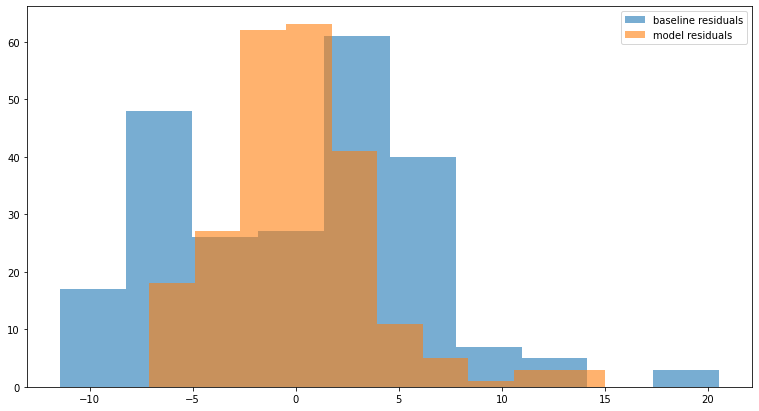

In [40]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(mpg_df.baseline_residuals, label='baseline residuals', alpha=.6)
ax.hist(mpg_df.residuals, label='model residuals', alpha=.6)
ax.legend()